<a href="https://colab.research.google.com/github/Amir-Fasil/Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### **After loading the iris dataset I used K-means++ initialization instead of forgy or random initialization method to increase the rate of convergence. I also noticed that, the silhouette score differ based on the number of cluster, therefore I calculated the optimum number of cluster and I used that for clustering.**

---



In [ ]:
def load_data():
  iris_dataset = load_iris()
  iris_data = iris_dataset.data
  iris_target = iris_dataset.target
  return iris_data, iris_target


In [ ]:
def optimum_cluster_num():

  silhouette_scores = []
  K_range = range(2, 10)

  X,Y = load_data()

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  for k in K_range:

      kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

      y_kmeans = kmeans.fit_predict(X_scaled)
      silhouette_avg = silhouette_score(X_scaled, y_kmeans)
      silhouette_scores.append(silhouette_avg)

  # Visualization
  plt.plot(K_range, silhouette_scores, marker='o')
  plt.xlabel("Number of Clusters (k)")
  plt.ylabel("Silhouette Score")
  plt.title("Silhouette Score for Optimal k")
  plt.show()

  optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
  return optimal_k


In [ ]:
def create_cluster():
  X,Y = load_data()
  num_cluster = optimum_cluster_num()

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  # Here I used K-mean++ initialization for better convergence
  kmeans = KMeans(n_clusters=num_cluster, init='k-means++', random_state=42, n_init=50)

  # The parameter random_state = 42 is a seed for the random number generator that
  # allow us to get the same number when we run it again and again.
  kmeans.fit(X_scaled)

  y_kmeans = kmeans.predict(X_scaled)

  silhouette_avg = silhouette_score(X_scaled, y_kmeans)
  print(f"Silhouette Score: {silhouette_avg:.3f}")

  # Visualize the clustering result (using first two features for visualization)
  plt.figure(figsize=(8, 6))
  plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', label="Clustered Data")
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label="Centroids")
  plt.title("K-Means Clustering Using two features")
  plt.xlabel("Feature 1 (Scaled)")
  plt.ylabel("Feature 2 (Scaled)")
  plt.legend()
  plt.show()

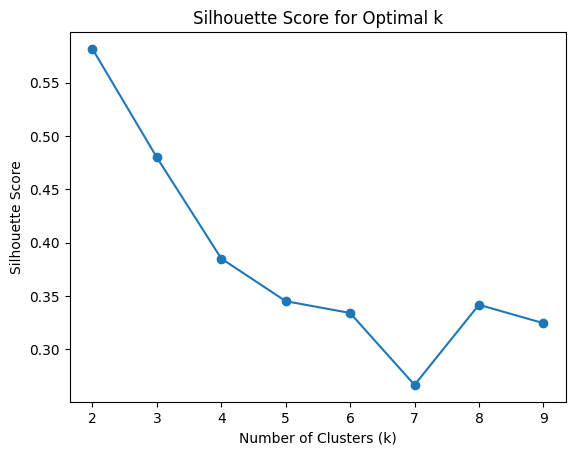

Silhouette Score: 0.582


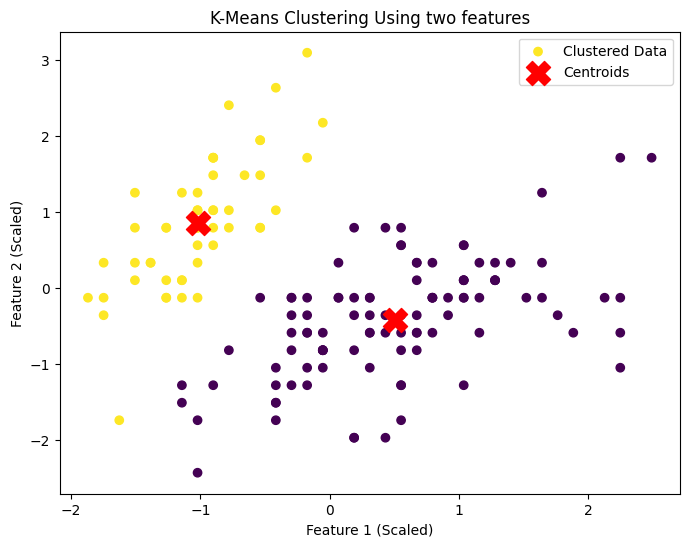

In [ ]:
create_cluster()

DBSCAN